### Análise de Sobreposição e Outliers com t-SNE

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

Calculando a redução de dimensionalidade com t-SNE (isto pode demorar)...
Cálculo concluído.


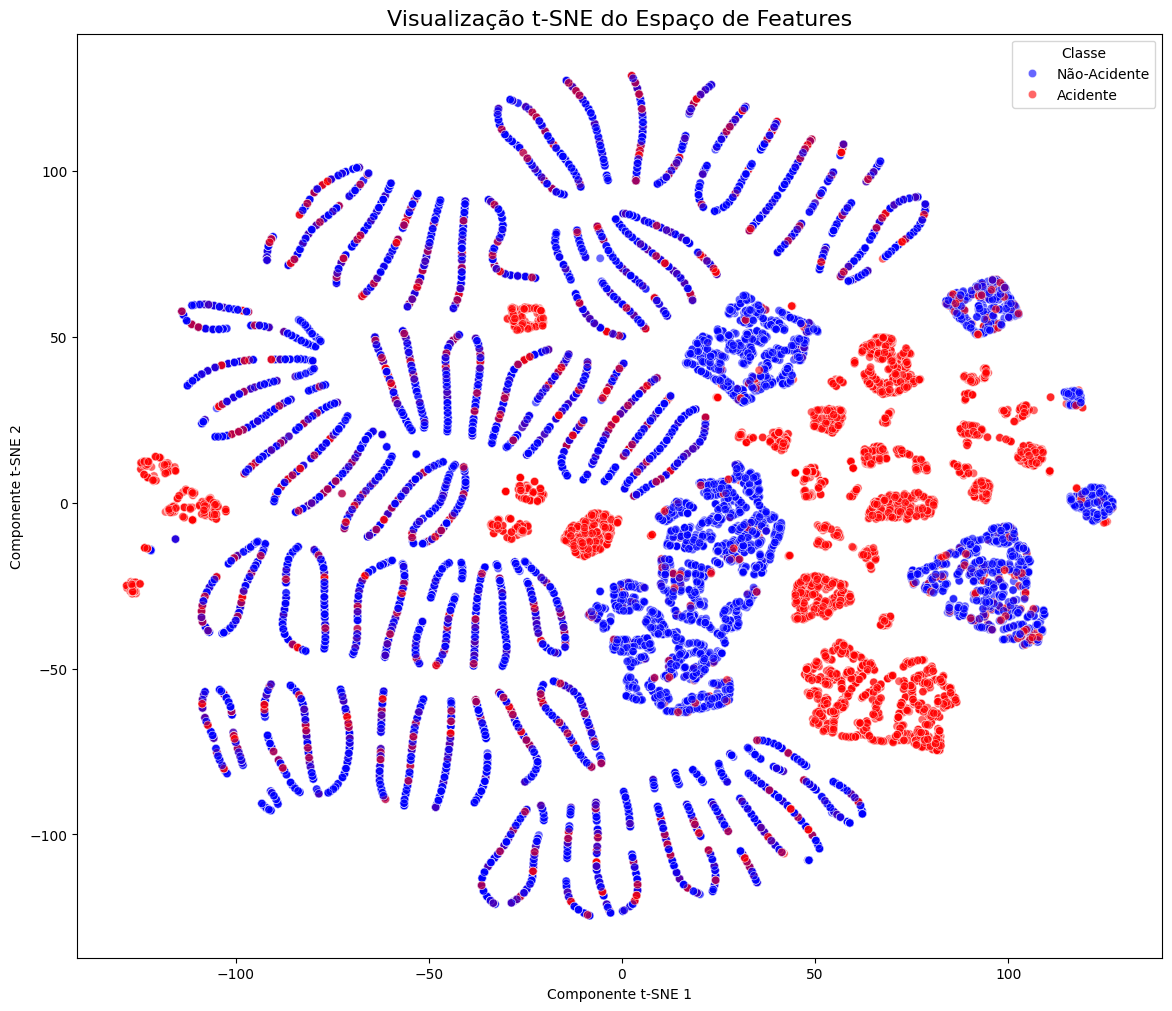

In [6]:
df = pd.read_csv('dataset_final_para_modelo.csv', decimal=',')

X_sample = df.drop(columns=['Sinistro', 'data'])
y_sample = df['Sinistro']

X_sample.fillna(-1, inplace=True)

# O t-SNE funciona com base em distâncias, então todas as features precisam de estar na mesma escala.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sample)

print("Calculando a redução de dimensionalidade com t-SNE (isto pode demorar)...")
tsne = TSNE(n_components=2, random_state=8, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)
print("Cálculo concluído.")

# --- VISUALIZAÇÃO ---

# 6. Crie um novo dataframe com os resultados 2D para facilitar o plot
df_tsne = pd.DataFrame()
df_tsne['componente_1'] = X_tsne[:, 0]
df_tsne['componente_2'] = X_tsne[:, 1]
df_tsne['Classe'] = y_sample.values # Usa 'y_sample' para garantir o alinhamento
df_tsne['Classe'] = df_tsne['Classe'].map({0: 'Não-Acidente', 1: 'Acidente'})

# 7. Crie o scatter plot final
plt.figure(figsize=(14, 12))
sns.scatterplot(
    data=df_tsne,
    x='componente_1',
    y='componente_2',
    hue='Classe',
    palette={'Não-Acidente': 'blue', 'Acidente': 'red'},
    alpha=0.6
)
plt.title('Visualização t-SNE do Espaço de Features', fontsize=16)
plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
#plt.legend(title='Classe', labels=['Não-Acidente', 'Acidente'])
plt.show()